In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv
/kaggle/input/dataset/noshowappointments-metadata.json


In [48]:
  import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import time
# Load dataset
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')
# Drop irrelevant columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1, inplace=True)
# Encode categorical columns
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
# Features and labels
X = df.drop('No-show', axis=1).values
y = df['No-show'].values.reshape(-1, 1)
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

    def backward(self, X, y_true, y_pred, lr):
        m = X.shape[0]
        dz2 = y_pred - y_true
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = np.dot(dz2, self.w2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.w1 -= lr * dw1
        self.b1 -= lr * db1
        self.w2 -= lr * dw2
        self.b2 -= lr * db2

    def train(self, X, y, epochs, lr):
        losses = []
        start = time.time()
        for i in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            self.backward(X, y, y_pred, lr)
            losses.append(loss)
            if i % 10 == 0:
                print(f"Epoch {i}: Loss = {loss:.4f}")
        end = time.time()
        print(f"Training completed in {end - start:.2f} seconds.")
        return losses


In [50]:

model = NeuralNetwork(input_size=X.shape[1], hidden_size=16, output_size=1)
losses = model.train(X_train, y_train, epochs=100, lr=0.1)
# Predict
y_pred_probs = model.forward(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)
# Metrics
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision, recall, _ = precision_recall_curve(y_val, y_pred_probs)
pr_auc = auc(recall, precision)
cm = confusion_matrix(y_val, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("Confusion Matrix:\n", cm)


Epoch 0: Loss = 0.6932
Epoch 10: Loss = 0.6225
Epoch 20: Loss = 0.5796
Epoch 30: Loss = 0.5531
Epoch 40: Loss = 0.5363
Epoch 50: Loss = 0.5255
Epoch 60: Loss = 0.5185
Epoch 70: Loss = 0.5137
Epoch 80: Loss = 0.5106
Epoch 90: Loss = 0.5084
Training completed in 3.46 seconds.
Accuracy: 0.7993
F1 Score: 0.0000
PR-AUC: 0.2184
Confusion Matrix:
 [[17669     0]
 [ 4437     0]]


In [51]:
# Training step (make sure this is called before plotting)
model = NeuralNetwork(input_size=X.shape[1], hidden_size=16, output_size=1)
losses = model.train(X_train, y_train, epochs=100, lr=0.1)


Epoch 0: Loss = 0.6931
Epoch 10: Loss = 0.6225
Epoch 20: Loss = 0.5796
Epoch 30: Loss = 0.5531
Epoch 40: Loss = 0.5363
Epoch 50: Loss = 0.5255
Epoch 60: Loss = 0.5184
Epoch 70: Loss = 0.5137
Epoch 80: Loss = 0.5105
Epoch 90: Loss = 0.5083
Training completed in 3.49 seconds.


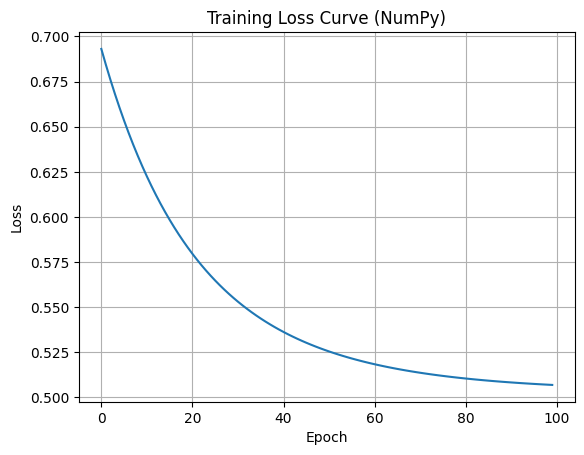

In [52]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (NumPy)")
plt.grid(True)
plt.show()


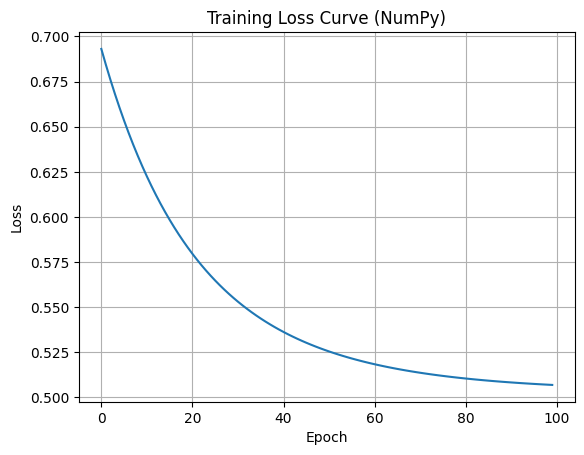

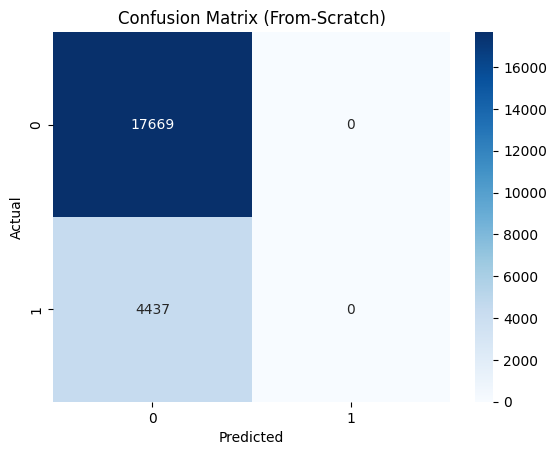

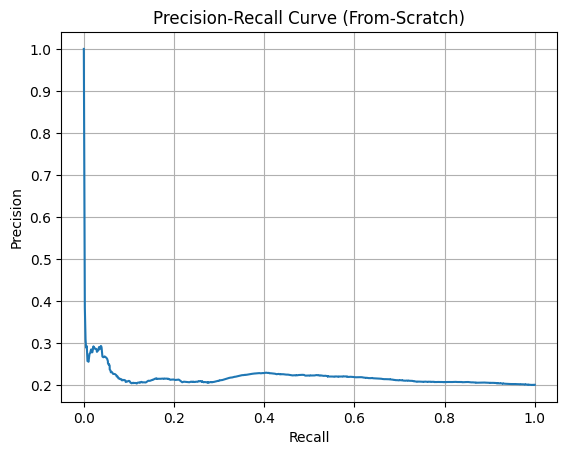

In [53]:
# Training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (NumPy)")
plt.grid(True)
plt.show()
# Confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (From-Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# PR Curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (From-Scratch)")
plt.grid()
plt.show()


In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Define network
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.fc2(self.relu(self.fc1(x))))

model = Net(input_dim=X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train
num_epochs = 100
losses = []
start = time.time()

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

end = time.time()
print(f"Training Time (PyTorch): {end - start:.2f} seconds")


Epoch 0, Loss: 0.6602
Epoch 10, Loss: 0.5215
Epoch 20, Loss: 0.5031
Epoch 30, Loss: 0.4957
Epoch 40, Loss: 0.4945
Epoch 50, Loss: 0.4929
Epoch 60, Loss: 0.4924
Epoch 70, Loss: 0.4921
Epoch 80, Loss: 0.4920
Epoch 90, Loss: 0.4918
Training Time (PyTorch): 0.86 seconds


In [55]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_val_tensor).numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)
# Metrics
acc_pt = accuracy_score(y_val, y_pred)
f1_pt = f1_score(y_val, y_pred)
precision_pt, recall_pt, _ = precision_recall_curve(y_val, y_pred_probs)
pr_auc_pt = auc(recall_pt, precision_pt)
cm_pt = confusion_matrix(y_val, y_pred)
print(f"\nPyTorch Evaluation:")
print(f"Accuracy: {acc_pt:.4f}")
print(f"F1 Score: {f1_pt:.4f}")
print(f"PR-AUC: {pr_auc_pt:.4f}")
print("Confusion Matrix:\n", cm_pt)



PyTorch Evaluation:
Accuracy: 0.7994
F1 Score: 0.0036
PR-AUC: 0.2735
Confusion Matrix:
 [[17664     5]
 [ 4429     8]]


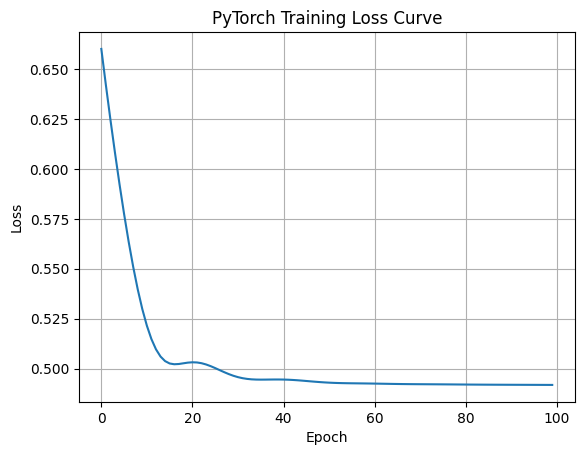

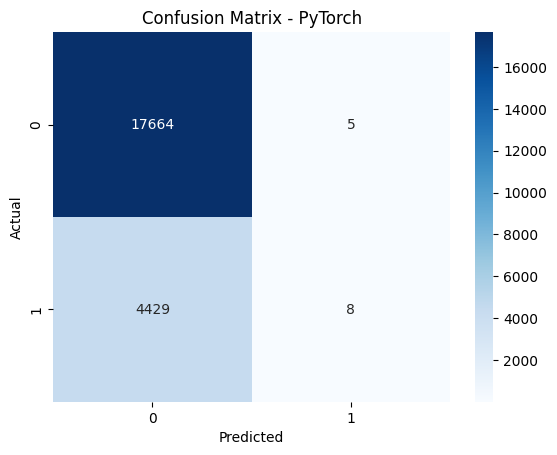

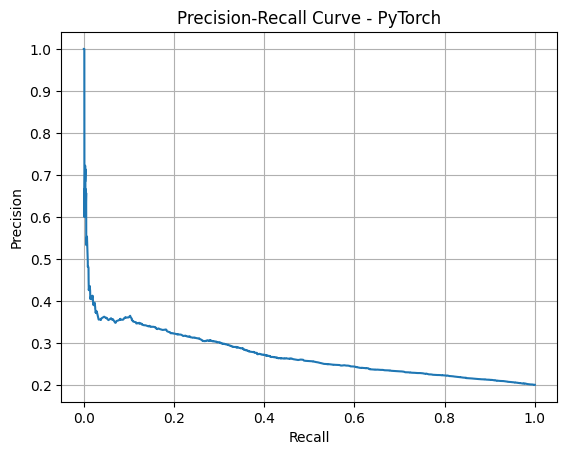

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# Training Loss
plt.plot(losses)
plt.title("PyTorch Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
# Confusion Matrix
sns.heatmap(cm_pt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - PyTorch")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# PR Curve
plt.plot(recall_pt, precision_pt)
plt.title("Precision-Recall Curve - PyTorch")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()
